# ESCALADO DE CARACTERÍSTICAS

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler,StandardScaler,RobustScaler,Normalizer,QuantileTransformer,PowerTransformer
from matplotlib import pyplot as plt

### Desactivamos la notación científica

In [25]:

pd.set_option('display.float_format', '{:.2f}'.format)


### Si es necesario podemos definir un diccionario definiendo el tipo de datos que deben tomar las variables al leer el archivo csv. 

In [5]:
#dtypes = {'NP':float, 'RNMDP_2020':float,'PobT':float,'PobH':float,'PobM':float,'Vehiculos':float,
#'T_Viviendas':float,'T_Viv_Prin':float,'T_Viv_Sec':float,'Viv_vacias':float,'T_viv_col':float}

Leer el archivo de datos

In [6]:
datos = pd.read_csv(r'C:\Users\crist\Documents\GitHub\manifolds\clustering-cities-spain\datos_metricas_socioeconomicos_porcentajes.csv', encoding = "ISO-8859-1"
)


In [13]:
datos

,Ciudades,TA,LPI,AREA_MN,AREA_AM,AREA_MD,GYRATE_MN,GYRATE_AM,GYRATE_MD,PRD,...,T_Viv_Sec,Viv_vacias,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI
0,Albacete,1605.293355,2.929497,0.116461,2.976411,0.031520,8.380829,36.057566,5.710261,0.498351,...,5168,15081,0.445018,6.865100,12.018658,28.687649,0.698910,0.553468,16.789481,33.941716
1,Alcalá de Henares,1615.304126,2.451039,0.136451,4.559123,0.019854,7.591469,55.583827,4.874116,0.495263,...,1255,5798,1.557489,11.259171,19.280883,41.836920,0.823273,1.896484,13.994314,9.351466
2,Alcobendas,1386.626321,2.882984,0.289423,3.843857,0.069676,12.998986,45.886723,9.320043,0.495263,...,566,1513,0.779649,10.608648,16.118619,12.718888,0.426558,4.777437,14.142538,40.427664
3,Alcorcón,787.044792,3.295528,0.161214,3.023467,0.028205,9.644223,43.879007,6.077800,1.016461,...,1303,3488,1.917222,6.864289,33.295606,25.021865,0.369681,0.344602,23.836880,8.349856
4,Algeciras,1063.319019,2.044908,0.063300,2.629819,0.013341,5.460983,38.065313,3.687046,0.752361,...,4700,6686,1.155169,2.049921,13.420545,14.524773,0.864348,0.355067,10.734807,56.895370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Valencia,2164.215491,2.515410,0.065111,4.506163,0.024895,6.216411,38.408851,4.992987,0.369649,...,33757,57193,2.379026,4.969881,20.811788,15.182360,0.892344,0.835998,46.083622,8.844982
68,Valladolid,2764.692882,2.285334,0.170702,9.992102,0.028855,8.463257,74.230483,5.392190,0.289363,...,10260,18757,0.554566,6.484727,20.232697,35.579456,0.798932,0.459606,19.956694,15.933323
69,Vigo,2673.672921,4.253406,0.076896,7.653004,0.037150,7.448687,40.795189,6.359690,0.299214,...,10536,18588,0.428888,3.261984,15.139326,20.636726,0.557649,0.404116,11.824315,47.746995
70,Zamora,551.778808,9.977708,0.075195,6.638329,0.018018,6.080244,52.258509,4.223122,1.449856,...,5092,6673,1.117133,4.423836,24.288501,27.917586,0.424895,0.199479,21.520892,20.107680


Visualización de la distribución de los datos en forma de tabla

In [16]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
TA,72.0,1.318404e+03,9.184625e+02,275.938786,643.117386,1.042544e+03,1.636392e+03,4.436371e+03
LPI,72.0,4.985617e+00,8.019584e+00,0.814449,2.485168,3.304187e+00,4.474848e+00,6.692839e+01
AREA_MN,72.0,9.916672e-02,5.319897e-02,0.041476,0.064779,8.647550e-02,1.161077e-01,3.390990e-01
AREA_AM,72.0,1.743274e+01,1.054410e+02,1.004617,2.417158,3.420482e+00,4.977895e+00,8.984540e+02
AREA_MD,72.0,2.392935e-02,1.060419e-02,0.009016,0.016829,2.243800e-02,2.839600e-02,6.967600e-02
GYRATE_MN,72.0,7.094323e+00,1.488582e+00,4.313018,6.056896,7.051056e+00,8.128589e+00,1.299899e+01
GYRATE_AM,72.0,5.511094e+01,9.310961e+01,23.790631,34.993618,4.084321e+01,5.114438e+01,8.211209e+02
GYRATE_MD,72.0,5.008917e+00,1.050683e+00,3.044126,4.273645,4.959739e+00,5.491379e+00,9.320043e+00
PRD,72.0,8.524466e-01,5.863966e-01,0.058042,0.401843,7.398030e-01,1.175061e+00,2.899194e+00
SHDI,72.0,7.892292e-01,2.464732e-01,0.615403,0.672139,7.145465e-01,8.012575e-01,2.307808e+00


La variable Frac_mn tiene una dato con valor infinito, por lo que eliminaremos la variable usando el método drop.

In [17]:
datos = datos.drop(columns='FRAC_MN')

La libreria sklean proporciona una variedad de métodos de escalado y normalización. Mayor información sobre cada método se puede consultar en la  [documentación de sklearn](https://scikit-learn.org/stable/modules/preprocessing.html).

Creamos un objeto para cada método importado.

In [20]:
MinMax =  MinMaxScaler()
Maxabs =  MaxAbsScaler()
Std = StandardScaler()
Rscaler =  RobustScaler()
Normalizer =  Normalizer()
QuantileT = QuantileTransformer()

Indexación del dataframe excluyendo la variable ciudades que es de tipo string

In [76]:
datos.iloc[:,1:50].describe().T

,count,mean,std,min,25%,50%,75%,max
TA,72.00,1318.40,918.46,275.94,643.12,1042.54,1636.39,4436.37
LPI,72.00,4.99,8.02,0.81,2.49,3.30,4.47,66.93
AREA_MN,72.00,0.10,0.05,0.04,0.06,0.09,0.12,0.34
AREA_AM,72.00,17.43,105.44,1.00,2.42,3.42,4.98,898.45
AREA_MD,72.00,0.02,0.01,0.01,0.02,0.02,0.03,0.07
GYRATE_MN,72.00,7.09,1.49,4.31,6.06,7.05,8.13,13.00
GYRATE_AM,72.00,55.11,93.11,23.79,34.99,40.84,51.14,821.12
GYRATE_MD,72.00,5.01,1.05,3.04,4.27,4.96,5.49,9.32
PRD,72.00,0.85,0.59,0.06,0.40,0.74,1.18,2.90
SHDI,72.00,0.79,0.25,0.62,0.67,0.71,0.80,2.31


In [83]:
datos.loc[:,"AREA_MN"]

0    0.12
1    0.14
2    0.29
3    0.16
4    0.06
     ... 
67   0.07
68   0.17
69   0.08
70   0.08
71   0.15
Name: AREA_MN, Length: 72, dtype: float64

(array([23., 20., 15.,  7.,  4.,  1.,  0.,  0.,  1.,  1.]),
 array([0.041476 , 0.0712383, 0.1010006, 0.1307629, 0.1605252, 0.1902875,
        0.2200498, 0.2498121, 0.2795744, 0.3093367, 0.339099 ]),
 <BarContainer object of 10 artists>)

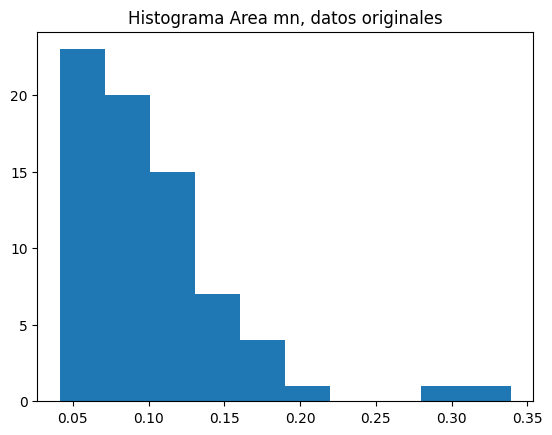

In [114]:
plt.title("Histograma Area mn, datos originales")
plt.hist(datos.loc[:,"AREA_MN"], bins = 10)


## Primer método: StandardScaler. 

Muchos algoritmos pueden comportarse de forma negativa si las variables no muestran uns distribución Gaussiana normalizada con media cero, y varianza igual a uno. En la práctica se suele ignorar la forma de la distribución, y transformar para centrarlos removiendo el valor medio de cada característica y dividiendolo por la desviación estandar. Muchos elementos de la función objetivo de un algoritmo de aprendizaje como RBF and SVM asumen que las carácteristicas están centradas cerca de cero y tienen una varianza en la misma magnitud.


In [21]:
# Ajustar el objeto Std creado utilizando los datos numéricos
Std.fit(datos.iloc[:,1:50])
# Transformar los datos utilizando el objeto ajustado
datos_std = Std.transform(datos.iloc[:,1:50])
# Convertir datos_std que era un array a un dataframe utilizando los nombres de las columans
df_datos_std = pd.DataFrame(datos_std, columns = datos.iloc[:,1:50].columns)
# Agregar al dataframe la columna con el nombre de las ciudades
df_datos_std['Ciudades'] = datos['Ciudades']

In [26]:
df_datos_std.describe()

,TA,LPI,AREA_MN,AREA_AM,AREA_MD,GYRATE_MN,GYRATE_AM,GYRATE_MD,PRD,SHDI,...,T_Viv_Sec,Viv_vacias,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,...,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,...,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-1.14,-0.52,-1.09,-0.16,-1.42,-1.88,-0.34,-1.88,-1.36,-0.71,...,-0.79,-0.65,-1.53,-0.78,-2.39,-1.86,-0.90,-0.80,-1.87,-1.57
25%,-0.74,-0.31,-0.65,-0.14,-0.67,-0.70,-0.22,-0.70,-0.77,-0.48,...,-0.58,-0.46,-0.80,-0.50,-0.67,-0.79,-0.62,-0.59,-0.72,-0.71
50%,-0.30,-0.21,-0.24,-0.13,-0.14,-0.03,-0.15,-0.05,-0.19,-0.31,...,-0.33,-0.28,-0.18,-0.18,-0.15,-0.11,-0.22,-0.31,-0.09,-0.14
75%,0.35,-0.06,0.32,-0.12,0.42,0.70,-0.04,0.46,0.55,0.05,...,0.11,0.04,0.56,0.12,0.55,0.48,0.18,0.13,0.48,0.60
max,3.42,7.78,4.54,8.41,4.34,3.99,8.28,4.13,3.51,6.20,...,4.98,6.48,2.25,7.00,2.79,2.81,5.93,5.36,2.79,2.81


(array([23., 20., 15.,  7.,  4.,  1.,  0.,  0.,  1.,  1.]),
 array([-1.09204316, -0.5286646 ,  0.03471396,  0.59809252,  1.16147108,
         1.72484964,  2.28822821,  2.85160677,  3.41498533,  3.97836389,
         4.54174245]),
 <BarContainer object of 10 artists>)

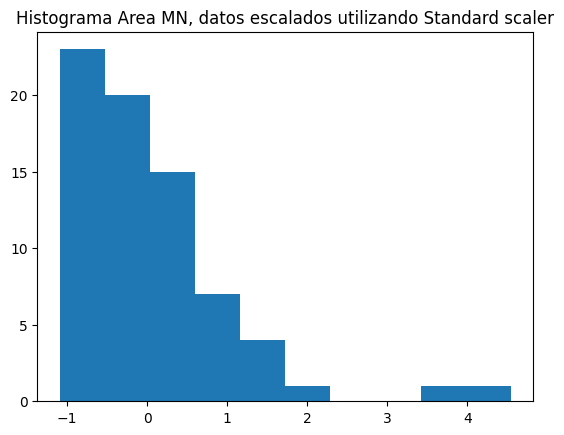

In [90]:
plt.title("Histograma Area MN, datos escalados utilizando Standard scaler")
plt.hist(df_datos_std.loc[:,"AREA_MN"])

Exportar los datos a un csv

In [25]:

df_datos_std.to_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_completos\df_datos_std.csv', encoding =  'ISO-8859-1')

### MinMaxScaler

La alternativa a la estandarización es escalar las caracteriscas para que se situan en un rango determinado, generalmente entre 0 y 1. La motivación para realizar esto es que es un procedimiento robusto cuando hay desviaciones estandar muy pequeñas de las características y preservar las entradas con valor 0 de los datos "sparse".

Los datos que son sparsity se refiere a aquellos en los que un porcentaje muy alto de los datos son datos perdidos o 0. Esta estructura a veces se utiliza para mejorar la eficiencia computacional y de almacenamiento.
 

In [33]:
MinMax.fit(datos.iloc[:,1:50])
datos_MinMax = MinMax.transform(datos.iloc[:,1:50])
df_datos_MinMax = pd.DataFrame(datos_MinMax, columns = datos.iloc[:,1:50].columns)
df_datos_MinMax['Ciudades'] = datos['Ciudades']

In [28]:
df_datos_MinMax.to_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_completos\df_datos_MinMax.csv', encoding =  'ISO-8859-1')

In [34]:
df_datos_MinMax.describe()

,TA,LPI,AREA_MN,AREA_AM,AREA_MD,GYRATE_MN,GYRATE_AM,GYRATE_MD,PRD,SHDI,...,T_Viv_Sec,Viv_vacias,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,...,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,0.25,0.06,0.19,0.02,0.25,0.32,0.04,0.31,0.28,0.10,...,0.14,0.09,0.40,0.10,0.46,0.40,0.13,0.13,0.40,0.36
std,0.22,0.12,0.18,0.12,0.17,0.17,0.12,0.17,0.21,0.15,...,0.17,0.14,0.27,0.13,0.19,0.22,0.15,0.16,0.22,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.09,0.03,0.08,0.00,0.13,0.20,0.01,0.20,0.12,0.03,...,0.04,0.03,0.19,0.04,0.33,0.23,0.04,0.03,0.25,0.20
50%,0.18,0.04,0.15,0.00,0.22,0.32,0.02,0.31,0.24,0.06,...,0.08,0.05,0.36,0.08,0.43,0.38,0.10,0.08,0.38,0.33
75%,0.33,0.06,0.25,0.00,0.32,0.44,0.03,0.39,0.39,0.11,...,0.16,0.10,0.55,0.11,0.57,0.50,0.16,0.15,0.50,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Text(0.5, 1.0, 'Histograma Área mn, datos escalados utilizando MinMax scaler ')

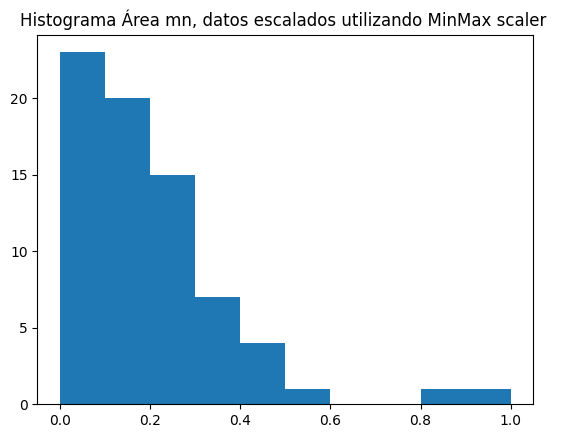

In [93]:
plt.hist(df_datos_MinMax.loc[:,"AREA_MN"])
plt.title("Histograma Área mn, datos escalados utilizando MinMax scaler ")

# Maxabs

Centrar los datos sparse destruiría la estructura sparseness de los datos, y por lo tanto raramente es un procedimiento adecuado. Sin embargo, puede tener sentido escalar entradas sparse, especialmente si las características se encuentran en distintas escalas. El escalamiento de MaxAbsScaler fue desarrollado especialmente para escalar datos sparse, y es la forma recomendada de hacer esto.


In [69]:
Maxabs.fit(datos.iloc[:,1:50])
datos_Maxabs = Maxabs.transform(datos.iloc[:,1:50])
df_datos_Maxabs  = pd.DataFrame(datos_Maxabs, columns = datos.iloc[:,1:50].columns)
df_datos_Maxabs['Ciudades'] = datos['Ciudades']

In [ ]:
df_datos_Maxabs.to_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_completos\df_datos_Maxabs.csv', encoding =  'ISO-8859-1')

In [71]:
df_datos_Maxabs.describe().T

,count,mean,std,min,25%,50%,75%,max
TA,72.00,0.30,0.21,0.06,0.14,0.23,0.37,1.00
LPI,72.00,0.07,0.12,0.01,0.04,0.05,0.07,1.00
AREA_MN,72.00,0.29,0.16,0.12,0.19,0.26,0.34,1.00
AREA_AM,72.00,0.02,0.12,0.00,0.00,0.00,0.01,1.00
AREA_MD,72.00,0.34,0.15,0.13,0.24,0.32,0.41,1.00
GYRATE_MN,72.00,0.55,0.11,0.33,0.47,0.54,0.63,1.00
GYRATE_AM,72.00,0.07,0.11,0.03,0.04,0.05,0.06,1.00
GYRATE_MD,72.00,0.54,0.11,0.33,0.46,0.53,0.59,1.00
PRD,72.00,0.29,0.20,0.02,0.14,0.26,0.41,1.00
SHDI,72.00,0.34,0.11,0.27,0.29,0.31,0.35,1.00


(array([23., 20., 15.,  7.,  4.,  1.,  0.,  0.,  1.,  1.]),
 array([0.12231236, 0.21008113, 0.29784989, 0.38561865, 0.47338742,
        0.56115618, 0.64892495, 0.73669371, 0.82446247, 0.91223124,
        1.        ]),
 <BarContainer object of 10 artists>)

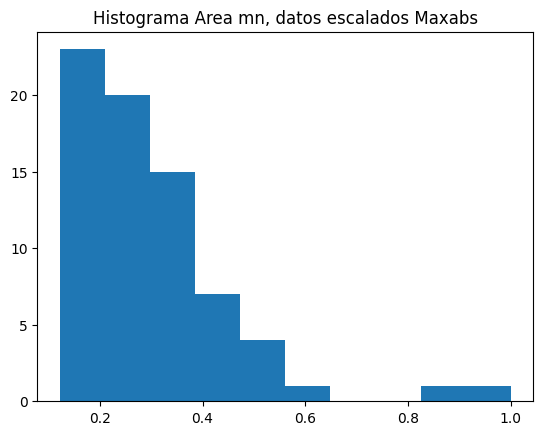

In [110]:
plt.title("Histograma Area mn, datos escalados Maxabs")
plt.hist(df_datos_Maxabs.loc[:,"AREA_MN"])

### ROBUST SCALER

Si los datos contienen datos atípicos, escalar usando la media y la varianza de los datos es probable que no funcione bien. En estos casos, es posible utilizar el RobustScaler como una alternativa. Este método usa estimadores más robustos para estimar la centralidad y rango de los valores.Este método de escalado no utiliza la media y escala los datos de acuerdo al rango cuantílico (Por defecto el rango intercuartílico). El rango intercuartílico se define como el rango entre el primer cuantil (25%) y el tercer cuantil (75%). 

[COMPARACIÓN DE DISTINTOS MÉTODOS DE ESCALADO APLICADO A UN DATASET CON
OUTLIERS](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-robust-scaler-section)

In [67]:
Rscaler.fit(datos.iloc[:,1:50])
datos_Rscaler = Rscaler.transform(datos.iloc[:,1:50])
df_datos_Rscaler = pd.DataFrame(datos_Rscaler, columns = datos.iloc[:,1:50].columns)
df_datos_Rscaler['Ciudades'] = datos['Ciudades']

In [66]:
df_datos_Rscaler
df_datos_Rscaler.to_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_completos\df_datos_Rscaler.csv', encoding =  'ISO-8859-1')

In [65]:
df_datos_Rscaler.describe().T

,count,mean,std,min,25%,50%,75%,max
TA,72.00,0.28,0.92,-0.77,-0.40,-0.00,0.60,3.42
LPI,72.00,0.85,4.03,-1.25,-0.41,0.00,0.59,31.98
AREA_MN,72.00,0.25,1.04,-0.88,-0.42,-0.00,0.58,4.92
AREA_AM,72.00,5.47,41.18,-0.94,-0.39,0.00,0.61,349.52
AREA_MD,72.00,0.13,0.92,-1.16,-0.48,0.00,0.52,4.08
GYRATE_MN,72.00,0.02,0.72,-1.32,-0.48,0.00,0.52,2.87
GYRATE_AM,72.00,0.88,5.77,-1.06,-0.36,0.00,0.64,48.31
GYRATE_MD,72.00,0.04,0.86,-1.57,-0.56,0.00,0.44,3.58
PRD,72.00,0.15,0.76,-0.88,-0.44,0.00,0.56,2.79
SHDI,72.00,0.58,1.91,-0.77,-0.33,0.00,0.67,12.34


(array([23., 20., 15.,  7.,  4.,  1.,  0.,  0.,  1.,  1.]),
 array([-0.87668764, -0.29685363,  0.28298038,  0.86281439,  1.44264841,
         2.02248242,  2.60231643,  3.18215044,  3.76198445,  4.34181847,
         4.92165248]),
 <BarContainer object of 10 artists>)

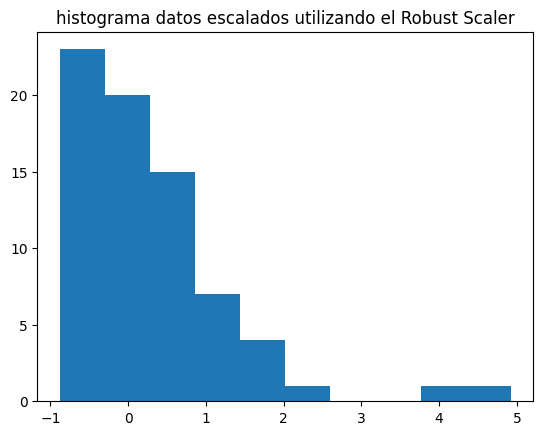

In [109]:
plt.title("Histograma Area Mn, datos escalados utilizando el Robust Scaler")
plt.hist(df_datos_Rscaler.loc[:,"AREA_MN"])

# Transformaciones no lineales

Dos tipos de transformaciones estan disponibles: la transformación de cuantil y la transformación de potencia. Ambas transformaciones están basadas en transformaciones monotónicas de las características y por lo tanto preservan el ranking de los valore a través de cada característica. Sin embargo, distorcionan las correlaciones y las distancias a través de las características. 

Las transformaciones de potencia pertenecen a una familia de transformaciones que apuntan a representar datos de cualquier distribución a una tan cercana posible a la distribución Gaussiana. 

Esto es necesario en algunos casos, debido a que algunos modelos requieren que las características en un set de datos cumplan estos requerimientos.

Las transformaciones de potencia actualmente proveen dos de estas transformaciones. La Yeo-Johnson y the Box-Cox. Box-Cox solo puede ser aplicada cuando los datos son mayor a 0. 

En ambos métodos, las transformaciones son parametrizadas por alpha que es determinada a través de estimación de máxima probabilidad. 

In both methods, the transformation is parameterized by, which is determined through maximum likelihood estimation. 

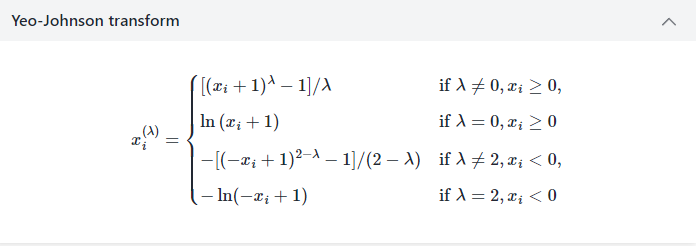

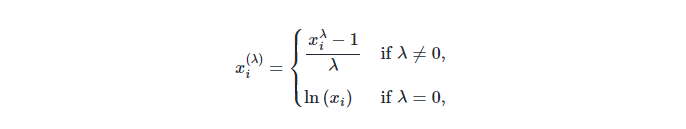


En resumen, el objetivo primario es transformar los datos para que estos presentan una distribución normal. Si los datos son mayores a 0, se puede utilizar una transformación de Box-Cox, si por el contrario, los datos contienen valores negativos o ceros, o si se busca una transformación más flexible que pueda manejar un mayor rango de valores, la transformación de Yeo-Johnson es preferible.  




In [73]:
PTrans = PowerTransformer(method='yeo-johnson', standardize=True)

In [74]:
PTrans.fit(datos.iloc[:,1:50])
datos_PTrans= PTrans.transform(datos.iloc[:,1:50])
df_datos_PTrans= pd.DataFrame(datos_PTrans, columns = datos.iloc[:,1:50].columns)
df_datos_PTrans['Ciudades'] = datos['Ciudades']

In [61]:
#df_datos_PTrans.to_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_completos\df_datos_PTrans.csv', encoding =  'ISO-8859-1')

In [112]:
df_datos_PTrans.describe().T

,count,mean,std,min,25%,50%,75%,max
TA,72.00,-0.00,1.01,-2.29,-0.79,-0.00,0.69,2.09
LPI,72.00,-0.00,1.01,-2.87,-0.53,0.01,0.52,2.67
AREA_MN,72.00,0.00,1.01,-1.73,-0.73,-0.03,0.68,2.30
AREA_AM,72.00,0.00,1.01,-2.09,-0.55,-0.00,0.53,2.60
AREA_MD,72.00,-0.00,1.01,-2.23,-0.73,0.06,0.70,2.45
GYRATE_MN,72.00,-0.00,1.01,-2.44,-0.67,0.09,0.78,2.91
GYRATE_AM,72.00,-0.00,1.01,-2.08,-0.45,0.05,0.65,2.87
GYRATE_MD,72.00,0.00,1.01,-2.64,-0.69,0.09,0.60,2.89
PRD,72.00,0.00,1.01,-2.21,-0.81,0.05,0.80,2.18
SHDI,72.00,-0.00,1.01,-1.72,-0.73,-0.18,0.63,2.23


(array([ 9.,  4., 10., 11.,  8., 13.,  6.,  6.,  3.,  2.]),
 array([-1.72731958, -1.32416401, -0.92100844, -0.51785287, -0.1146973 ,
         0.28845827,  0.69161384,  1.09476941,  1.49792499,  1.90108056,
         2.30423613]),
 <BarContainer object of 10 artists>)

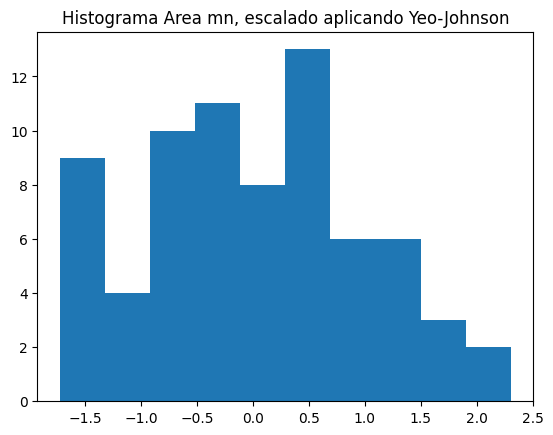

In [113]:
plt.title("Histograma Area mn, escalado aplicando Yeo-Johnson")
plt.hist(df_datos_PTrans.loc[:,"AREA_MN"])